In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as stats
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

# Regresja Grzbietowa - L2

Budujemy zbiór

In [2]:
true_fun = lambda X: np.cos(1.5 * np.pi * X)
n_samples=20
x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.randn(n_samples) * 0.1
x=np.vstack(x)

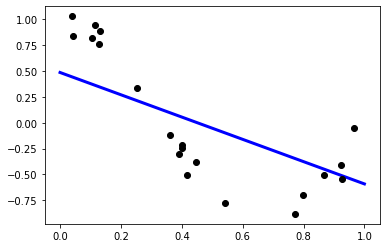

In [3]:
clf = Ridge(alpha=1.0)
clf.fit(x, y) 

x_plot = np.vstack(np.linspace(0, 1, 20))
plt.plot(x_plot, clf.predict(x_plot), color='blue',linewidth=3)
plt.plot(x, y, 'ok');
plt.show()

Regresja liniowa ze zmiennymi wielomianowymi

LR degree 2
LR degree 20


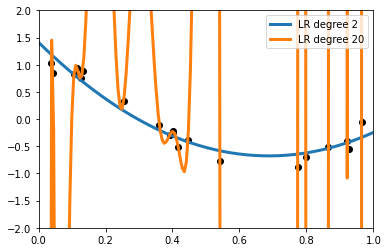

In [4]:
# prepare models
models = []
predicts = []
names=[]
models.append(('LR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('LR degree 20', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression()) ))

x_plot = np.vstack(np.linspace(-3, 3, 1000))
for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
x_plot = np.vstack(np.linspace(-3, 3, 1000))
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()    
plt.show()    

Grid search - stopień wielomianu i alpha

In [5]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Ridge()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7],
                    'ridge__alpha': [0.1, 1, 2, 3]},
                    cv=5,
                    refit=False)
grid.fit(x, y)
grid.best_params_

{'polynomialfeatures__degree': 7, 'ridge__alpha': 0.1}

### Zadanie 1.

Dopasuj regresję ridge do danych. Sprawdź które współczynniki zostały zmniejszone względem zwykłej regresji liniowej.

In [7]:
from sklearn.datasets import make_regression

In [8]:
n_samples, n_features, n_informative = 1000, 20, 10
rng = np.random.RandomState(0)
X, y = make_regression(n_samples=n_samples, 
                       n_features=n_features, 
                       n_informative=n_informative, 
                       random_state=rng)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.069569,-1.449855,0.769006,1.029079,-1.924100,0.738182,0.050648,0.431314,-0.140589,2.250977,0.508393,1.232522,0.426923,-0.686352,-0.514991,-0.043792,1.592111,1.286825,1.206873,-1.385308
1,0.164913,-1.405967,0.836636,-0.288131,-1.410823,-0.114962,0.495851,-1.394840,0.405080,-1.274319,-1.713915,0.795550,1.179420,0.711785,0.273729,-0.307068,-0.937948,0.129555,0.138745,-1.402331
2,-0.368782,-0.716642,1.698623,-0.387573,0.493682,2.195156,0.215677,2.190078,-0.038940,0.740299,1.507576,1.270354,-1.320544,1.223768,0.899885,-2.001396,0.326204,1.381349,-0.961049,0.596878
3,-0.993124,0.003771,0.339965,0.841631,0.280442,-0.206904,0.880179,0.643314,-1.128011,0.160928,-0.267734,-1.570623,0.931848,-0.249459,0.493837,-0.394850,0.049495,0.698457,-0.015682,-0.190653
4,-1.580732,-0.901989,-0.450676,1.368374,-0.604567,0.091259,0.571180,0.054684,-0.761465,-1.015132,-1.471651,-0.215548,-0.054830,-0.708785,-1.113764,0.645437,-0.536059,-0.074344,0.710070,1.871829
